#  Question 1

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
books = pd.read_csv("book.csv")
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
books.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Visualization of input dataset 

<AxesSubplot:ylabel='Count'>

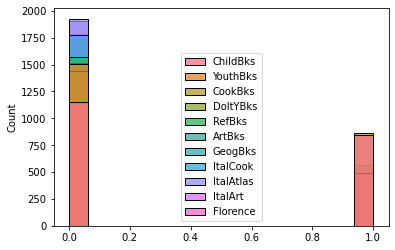

In [5]:
sns.histplot(data=books)

<AxesSubplot:>

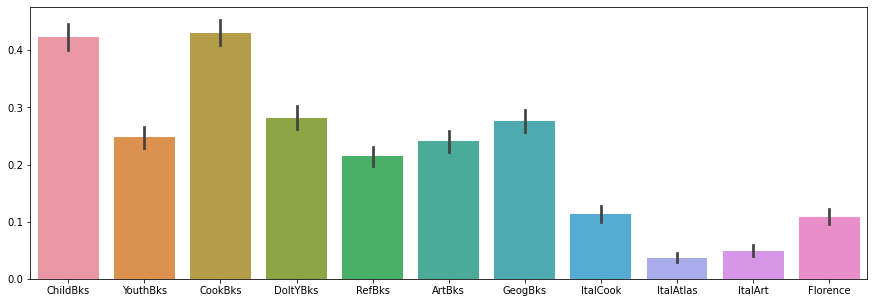

In [6]:
plt.figure(figsize= (15,5))
sns.barplot(data=books)

##   Apriori Algorithm 1

In [7]:
books_freq = apriori(books, min_support=0.1, use_colnames=True, max_len=2)
books_freq

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


##  Association rule

In [8]:
books_rule = association_rules(books_freq, metric="lift", min_threshold=0.5)
books_rule
books_rule.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
39,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304
38,(GeogBks),(ArtBks),0.2760,0.2410,0.1275,0.461957,1.916832,0.060984,1.410667
37,(GeogBks),(RefBks),0.2760,0.2145,0.1105,0.400362,1.866491,0.051298,1.309958
36,(RefBks),(GeogBks),0.2145,0.2760,0.1105,0.515152,1.866491,0.051298,1.493250
33,(ArtBks),(DoItYBks),0.2410,0.2820,0.1235,0.512448,1.817192,0.055538,1.472664
32,(DoItYBks),(ArtBks),0.2820,0.2410,0.1235,0.437943,1.817192,0.055538,1.350397
19,(GeogBks),(YouthBks),0.2760,0.2475,0.1205,0.436594,1.764017,0.052190,1.335627
18,(YouthBks),(GeogBks),0.2475,0.2760,0.1205,0.486869,1.764017,0.052190,1.410945


##  Inference 

###  The first rule states that CookBks and ItalCook are read frequently. The support for CookBks is 0.1135. The confidence for this rule is 0.2633 which means that out of all the books containing CookBks, 26.33% of the books are likely to contain ItalCook as well. Finally, lift of 2.32 shows that the ItalCook are 2.32 more likely to be read by the readers who has CookBks.

##  Visualization 

###  support vs confidence 

Text(0.5, 1.0, 'support vs confidence')

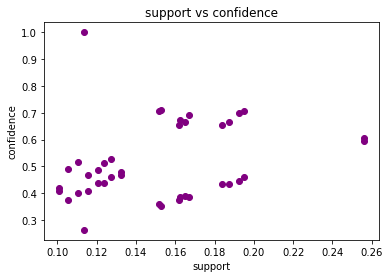

In [9]:
plt.scatter(x= books_rule.support, y=books_rule.confidence,c="purple" )
plt.xlabel("support")
plt.ylabel("confidence")
plt.title("support vs confidence")

###  support vs lift

Text(0.5, 1.0, 'support vs lift')

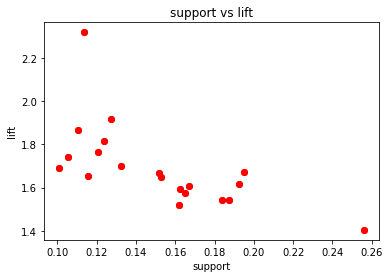

In [10]:
plt.scatter(x= books_rule.support, y=books_rule.lift,c="red" )
plt.xlabel("support")
plt.ylabel("lift")
plt.title("support vs lift")

###  confidence vs lift 

Text(0.5, 1.0, 'confidence vs lift')

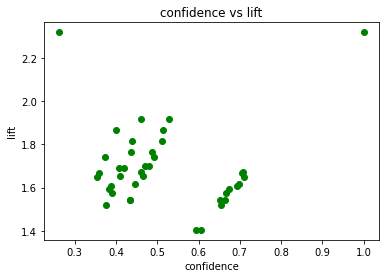

In [11]:
plt.scatter(x= books_rule.confidence , y=books_rule.lift,c="green" )
plt.xlabel("confidence")
plt.ylabel("lift")
plt.title("confidence vs lift")

###  support vs confidence vs lift

Text(0.5, 1.0, 'support vs confidence vs lift')

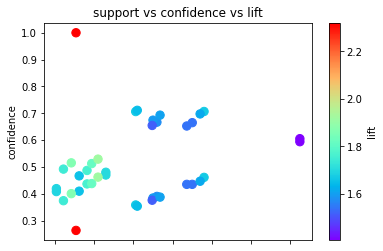

In [12]:
books_rule.plot(x="support",y ="confidence",c="lift",kind="scatter",s=70 ,cmap="rainbow") 
plt.title('support vs confidence vs lift')

<AxesSubplot:xlabel='support', ylabel='confidence'>

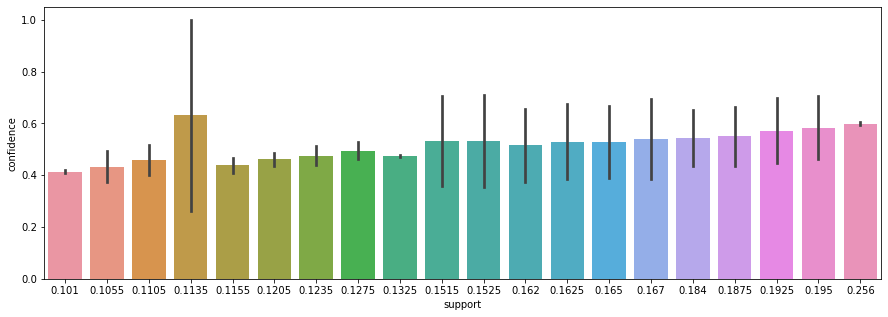

In [13]:
plt.figure(figsize= (15,5))
sns.barplot(data=books_rule, x="support", y="confidence")

##   Apriori Algorithm 2

In [14]:
books_freq2 = apriori(books, min_support=0.01, use_colnames=True, max_len=5)
books_freq2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
542,0.0125,"(ItalCook, CookBks, ItalArt, ArtBks, ItalAtlas)"
543,0.0150,"(ItalCook, DoItYBks, GeogBks, ItalArt, ArtBks)"
544,0.0110,"(ItalCook, GeogBks, RefBks, ItalArt, ArtBks)"
545,0.0115,"(GeogBks, RefBks, ItalArt, ArtBks, ItalAtlas)"


##  Association rule

In [15]:
books_rule2 = association_rules(books_freq2, metric="confidence",min_threshold=0.7 )
books_rule2.sort_values("lift", ascending= False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1034,"(GeogBks, ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0115,0.0200,0.0115,1.000000,50.000000,0.011270,inf
1042,"(ItalCook, ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0130,0.0200,0.0125,0.961538,48.076923,0.012240,25.480000
1032,"(RefBks, GeogBks, ItalArt)","(ItalAtlas, ArtBks)",0.0135,0.0180,0.0115,0.851852,47.325103,0.011257,6.628500
832,"(ChildBks, ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0155,0.0200,0.0145,0.935484,46.774194,0.014190,15.190000
837,"(RefBks, ItalArt)","(ChildBks, ItalAtlas, ArtBks)",0.0200,0.0155,0.0145,0.725000,46.774194,0.014190,3.580000
973,"(CookBks, ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0140,0.0200,0.0130,0.928571,46.428571,0.012720,13.720000
494,"(RefBks, ItalArt)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
496,"(ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
830,"(ChildBks, RefBks, ItalArt)","(ItalAtlas, ArtBks)",0.0180,0.0180,0.0145,0.805556,44.753086,0.014176,5.050286
839,"(ItalAtlas, ArtBks)","(ChildBks, RefBks, ItalArt)",0.0180,0.0180,0.0145,0.805556,44.753086,0.014176,5.050286


##  Inference 

###  The first rule states that (GeogBks, ItalAtlas, ArtBks) and (RefBks, ItalArt) are read frequently. The support for  (GeogBks, ItalAtlas, ArtBks)  is 0.115. The confidence for this rule is 1.0 which means that out of all the books containing  (GeogBks, ItalAtlas, ArtBks) , 26.33% of the books are likely to contain(RefBks, ItalArt) as well. Finally, lift of 2.32 shows that the (RefBks, ItalArt) are 2.32 more likely to be read by the readers who has  (GeogBks, ItalAtlas, ArtBks)

##  Visualization 

###  support vs confidence 

Text(0.5, 1.0, 'confidence vs support')

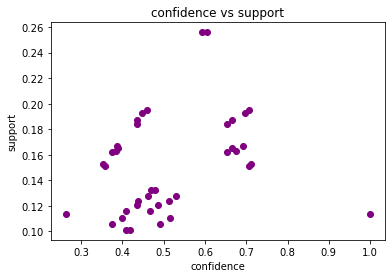

In [16]:
plt.scatter(y= books_rule.support, x=books_rule.confidence,c="purple" )
plt.ylabel("support")
plt.xlabel("confidence")
plt.title("confidence vs support")

###  confidence vs lift 

Text(0.5, 1.0, 'confidence vs lift')

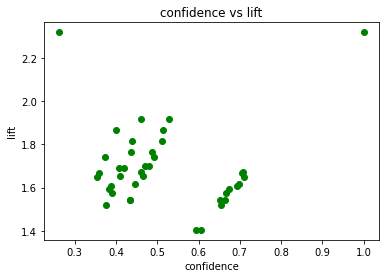

In [17]:
plt.scatter(x= books_rule.confidence , y=books_rule.lift,c="green" )
plt.xlabel("confidence")
plt.ylabel("lift")
plt.title("confidence vs lift")

###  support vs lift

Text(0.5, 1.0, 'support vs lift')

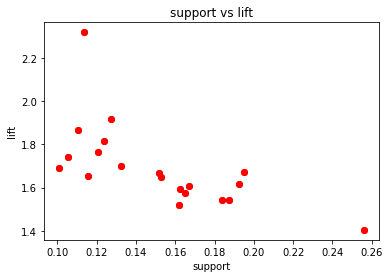

In [18]:
plt.scatter(x= books_rule.support, y=books_rule.lift,c="red" )
plt.xlabel("support")
plt.ylabel("lift")
plt.title("support vs lift")

###  support vs lift vs confidence 

Text(0.5, 1.0, 'support vs lift vs confidence')

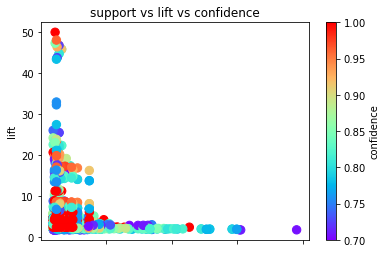

In [20]:
books_rule2.plot(x="support",y ="lift",c="confidence",kind="scatter",s=70 ,cmap="rainbow") 
plt.title('support vs lift vs confidence')